# Análisis de Resultados (Generales)

In [2]:
import numpy as np
import datetime
from datetime import date
import json
import pylab
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from sklearn.preprocessing import normalize

## Cargamos Data

In [3]:
path='./resultados' 
path_res='%s/Results.csv' %(path)
    
result = pd.read_csv(path_res, sep=",", header=0,  dtype={'week': str,'year': str})
print(len(result))
result.head(5)

616


,CO_ID,YEAR,WEEK,PROFILE_ID,SIZE,D0T0P0,D0T0P1,D0T0P2,D0T0P3,D0T0P4,...,D6T3P30,D6T3P31,D6T3P32,D6T3P33,D6T3P34,D6T3P35,D6T3P36,D6T3P37,INDIVIDUAL_CLUSTER,COLLECTIVE_CLUSTER
0,10002698,2018,18,0,3.7290,0.0000,0.0000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24
1,10002698,2018,19,1,3.9590,0.2110,0.2078,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,10002698,2018,20,2,2.8130,0.0000,0.0000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,10002698,2018,21,3,5.3620,0.0002,0.0000,0.0,0.0,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,30
4,10002698,2018,22,4,0.7254,0.0006,0.0000,0.0,0.0,0.0006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


### Variables de Apoyo - Clientes

In [5]:
clientes = result.CO_ID.unique()      # Lista de Clientes

In [5]:
#  pip install plotly 

## Distribución de Clientes por Cluster

#### Por Cluster Collectivo

=>   59  clusters


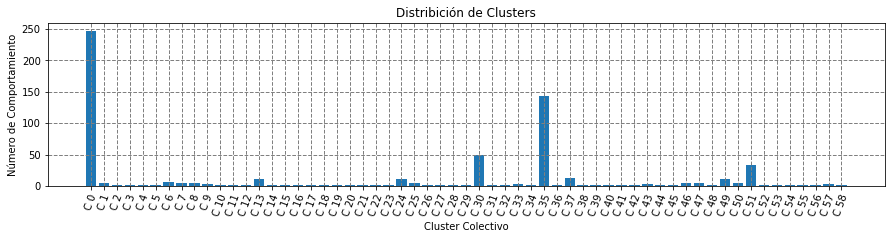

Done


In [10]:
   
#   -------------------------------------------------------------------------------------------------       
temporal= result.groupby(['COLLECTIVE_CLUSTER'], as_index=False, sort=True)['CO_ID'].count()

print("=>  ",str(len(temporal))," clusters")

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111, frameon=True)

data = ax.bar(temporal.index, temporal['CO_ID'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Cluster Colectivo')
ax.set_xticks(temporal.index)

ax.set_ylabel('Número de Comportamiento')
tag =[]
for j in range(len(temporal)):
    nn = 'C '+ str(j)+''
    tag.append(nn)
    del(nn)

ax.set_xticklabels(tag, rotation=70)



title = "Distribición de Clusters"
ax.set_title(title,)
plt.show()
del(temporal)
print('Done')

#### Por Cluster  Individual

=>   4  clusters


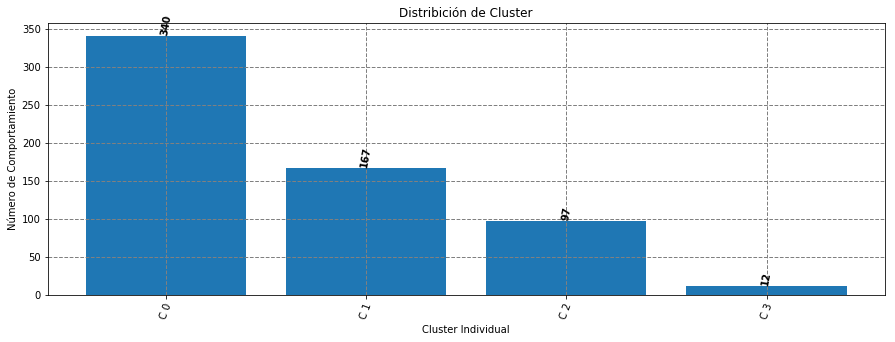

Done


In [11]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%d' % int(height),
                ha='center', va='bottom',  rotation=80, fontweight='bold', color='Black')
        
        
#   -------------------------------------------------------------------------------------------------       
temporal= result.groupby(['INDIVIDUAL_CLUSTER'], as_index=False, sort=True)['CO_ID'].count()

print("=>  ",str(len(temporal))," clusters")
#fig, ax = plt.subplots()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, frameon=True)

data = ax.bar(temporal.index, temporal['CO_ID'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Cluster Individual')
ax.set_xticks(temporal.index)

ax.set_ylabel('Número de Comportamiento')
tag =[]
for j in range(len(temporal)):
    nn = 'C '+ str(j)+''
    tag.append(nn)
    del(nn)

ax.set_xticklabels(tag, rotation=70)

autolabel(data)

title = "Distribición de Cluster"
ax.set_title(title)
plt.show()
del(temporal)
print('Done')

## Clusters Individual por collectivo

In [12]:
# matrix of clusters

temporal= result.groupby(['COLLECTIVE_CLUSTER','INDIVIDUAL_CLUSTER'], as_index=False, sort=True)['CO_ID'].count()

matrix = np.zeros((len(temporal.COLLECTIVE_CLUSTER.unique()), len(temporal.INDIVIDUAL_CLUSTER.unique())))
for x in temporal.COLLECTIVE_CLUSTER.unique():
    temporal_i = temporal[(temporal.COLLECTIVE_CLUSTER == x)]
    temporal_i = temporal_i.groupby(['INDIVIDUAL_CLUSTER'], as_index=False, sort=True)['CO_ID'].sum().T
    a = list(temporal_i.values[1])
    for i in range(len(a)):
        matrix[x][i]=a[i]
    del(a,temporal_i)
temporal = pd.DataFrame(matrix)
matrix
# temporal['total']=temporal.iloc[:,:].sum(axis=1)
temporal.head()
#temporal


,0,1,2,3
0,158.0,50.0,38.0,1.0
1,3.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


### Variables de Apoyo - Mccg

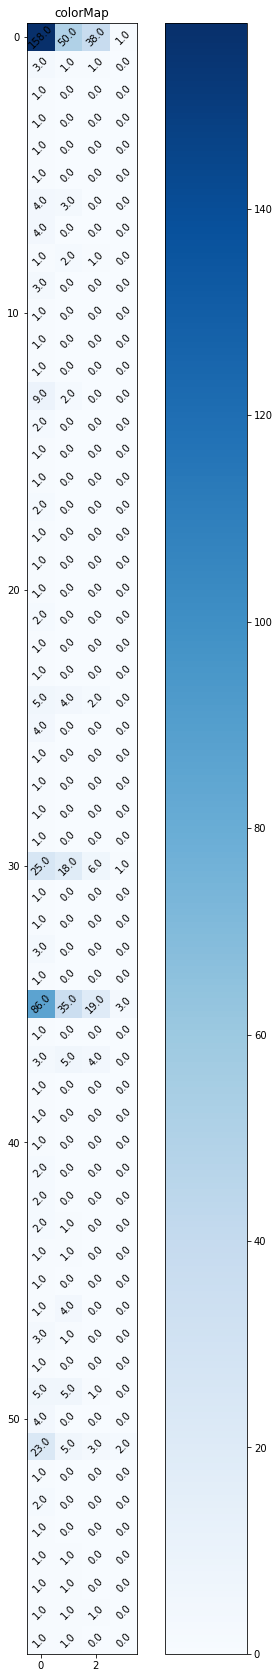

In [23]:
H = matrix

fig = plt.figure(figsize=(10, 30))

ax = fig.add_subplot(111)
ax.set_title('colorMap')

im = plt.imshow(H, cmap="Blues")

# plt.imshow(H)
ax.set_aspect('equal')


for i in range(len(temporal)):
    for j in range(len(temporal.iloc[1])):
        text = ax.text(j, i, round(matrix[i, j],3), ha="center", va="center", color="Black", rotation=45)

ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
ax.patch.set_alpha(0)
ax.set_frame_on(True)
plt.colorbar(orientation='vertical')
plt.show()

## Comportamiento de los clusters en el Tiempo

No handles with labels found to put in legend.


Done


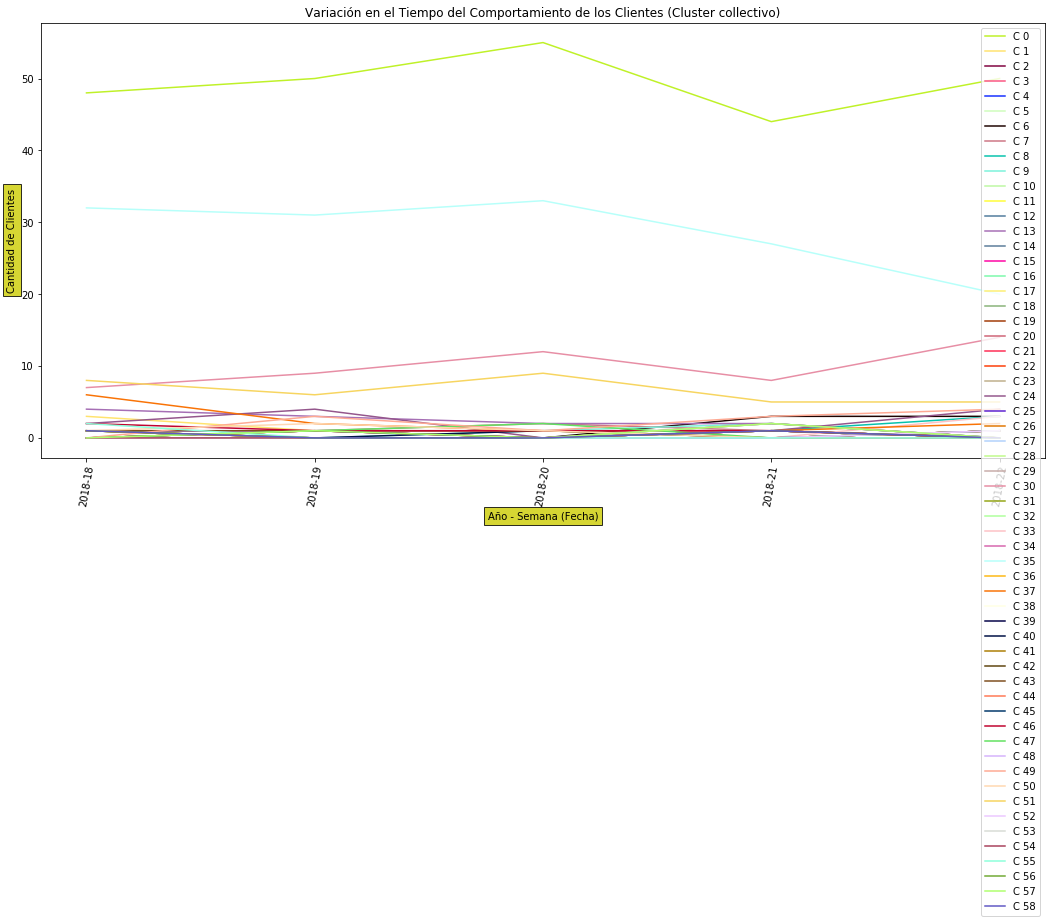

In [25]:
from datetime import datetime
def fromisocalendar(y,w,d):
    date = datetime.strptime( "%04dW%02d-%d"%(y,w-1,d), "%YW%W-%w")
    aa = date.year
    mm = date.month
    dd = date.day
    return str(aa)+"-"+str(mm)+"-"+str(dd) 

import matplotlib._color_data as mcd
box = dict(facecolor='#cccc00', pad=4, alpha=0.8)

   
longitud = len(result.groupby(['COLLECTIVE_CLUSTER'], as_index=False, sort=True)['CO_ID'].count())
temporal = result.groupby(['YEAR','WEEK','COLLECTIVE_CLUSTER'], as_index=False, sort=True)['CO_ID'].count()
temporal['fecha'] = temporal['YEAR'].astype(str).str.cat(temporal['WEEK'].astype(str), sep='-')
temporal = temporal[['fecha','COLLECTIVE_CLUSTER','CO_ID']]
helper = temporal.groupby(['fecha']).count()
helper['fecha'] = helper.index
    
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111, frameon=True)
x = list(temporal['fecha'].drop_duplicates())
x1 = x
for j in range(len(x)):
    # x1[j] = fromisocalendar(int(x[j][:4]),int(x[j][5:len(x[j])]),2)
    x1[j] = x[j]
        
ax.set_xticklabels(x1, rotation=80)

# ------------ COLORES ---------------------
overlap = mcd.XKCD_COLORS
colores = ["" for x in range(len(overlap))]
for j, n in enumerate(sorted(overlap, reverse=True)):
    cor = mcd.XKCD_COLORS[n].upper()
    colores[j] = cor

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

from datetime import datetime

for k in range(longitud):
    cluster_k = temporal[temporal['COLLECTIVE_CLUSTER']==k]
    cluster_k1 = helper.set_index('fecha').join(cluster_k.set_index('fecha'), lsuffix='_x', rsuffix='_y')
    cluster_k1 = cluster_k1[['CO_ID_y']]
    cluster_k1 = cluster_k1.fillna(0)
    y = cluster_k1['CO_ID_y']
    #x = cluster_k1.index
    ax.plot(x,y,'-',color=colores[k*9],label="C "+str(k))

    
    
ax.legend()
title = 'Variación en el Tiempo del Comportamiento de los Clientes (Cluster collectivo)'
ax.set_title(title)
ax.set_xlabel('Año - Semana (Fecha)', bbox=box)
ax.set_ylabel('Cantidad de Clientes', bbox=box)

del(temporal,helper)
print('Done')

## Distribucion de Semanas con "n" Clientes 

=>   5  clusters


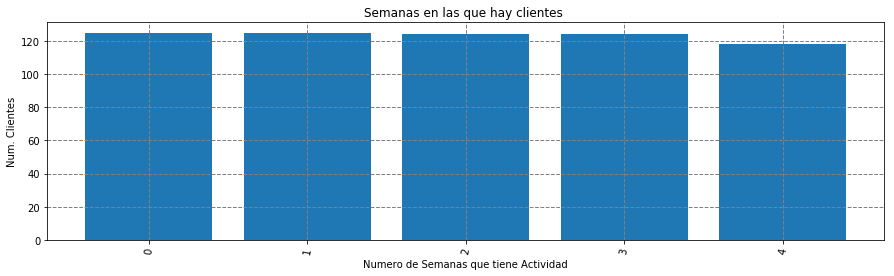

Done


In [26]:
temp= result.groupby(['PROFILE_ID'], as_index=False, sort=True)['CO_ID'].count()

print("=>  ",str(len(temp))," clusters")

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111, frameon=True)
ax.bar(temp.index, temp['CO_ID'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Numero de Semanas que tiene Actividad')
ax.set_xticks(temp.index)

ax.set_ylabel('Num. Clientes')
tag =[]
for j in range(len(temp)):
    nn = ''+ str(j)+''
    tag.append(nn)
    del(nn)

ax.set_xticklabels(tag, rotation=80)
    
title = "Semanas en las que hay clientes "
ax.set_title(title)
plt.show()
del(temp)
print('Done')


=>   3  clusters


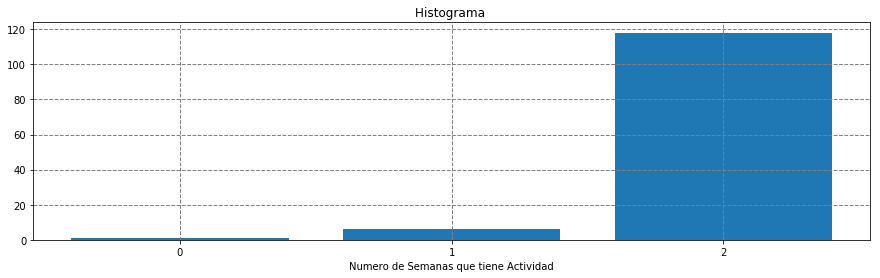

Done


In [29]:
temp = result.groupby(['CO_ID'], as_index=False, sort=True)['SIZE'].count()
temp = temp.groupby(['SIZE'], as_index=False, sort=True).count()

print("=>  ",str(len(temp))," clusters")

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111, frameon=True)
ax.bar(temp.index, temp['CO_ID'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Numero de Semanas que tiene Actividad')
ax.set_xticks(temp.index)
"""
ax.set_ylabel('Num. Clientes')
tag =[]
for j in range(len(temp)):
    nn = ''+ str(j)+''
    tag.append(nn)
    del(nn)

ax.set_xticklabels(tag, rotation=80)
    """
title = "Histograma "
ax.set_title(title)
plt.show()
del(temp)
print('Done')


## Centroides

In [30]:
# Abrimos el File para cargar los centroides 
path_res='%s/U.collective_footprint.clusters'%(path)
centroides = pd.read_csv(path_res, sep=";", header=0,  dtype={'WEEK': str,'YEAR': str})


### Seleccionamos Centroide o cluster deseado

In [32]:
num_cluster = 8
# extraemos
centroides_i = centroides[(centroides.COLLECTIVE_CLUSTER == num_cluster)]
centroides_i

,COLLECTIVE_CLUSTER,D0T0P0,D0T0P1,D0T0P2,D0T0P3,D0T0P4,D0T0P5,D0T0P6,D0T0P7,D0T0P8,...,D6T3P28,D6T3P29,D6T3P30,D6T3P31,D6T3P32,D6T3P33,D6T3P34,D6T3P35,D6T3P36,D6T3P37
8,8,0.034788,0.032159,0.000012,0.0,0.0,0.0,0.000224,0.000029,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Definimos parametros
title = centroides_i.iloc[:,1:].columns
datos = centroides_i.iloc[:,1:].values
datos = datos[0]
turnos = ["Mad", "Mañ", "Tar", "Noc"]
dias = ["L", "M", "M", "J", "V", "S", "D"]


In [38]:
td = np.zeros((len(turnos),len(dias)))
tm = np.zeros((len(turnos),38))
dm = np.zeros((len(dias),38))

# Agrupamos por Mccg 
contador = 0
for m in range(38):
    for t in range(len(turnos)):        # filas
        for d in range(len(dias)):    #columnas 
            
            td[t][d] += datos[contador]
            contador += 1

# Agrupamos por Dias 
contador = 0
for m in range(38):
    for t in range(len(turnos)):        # filas
        for d in range(len(dias)):    #columnas
            tm[t][m] += datos[contador]
            contador += 1
            
# Agrupamos por Turnos 
contador = 0
for m in range(38):
    for t in range(len(turnos)):        # filas
        for d in range(len(dias)):    #columnas
            dm[d][m] += datos[contador]
            contador += 1

In [17]:
td

array([[0.03792231, 0.03156826, 0.99363265, 0.00757144, 0.00640414,
        0.02017345, 0.00933076],
       [0.        , 0.00791855, 0.02151858, 0.0120915 , 0.        ,
        0.00226244, 0.00188537],
       [0.0055886 , 0.00596568, 0.00452489, 0.01706293, 0.00641026,
        0.00810689, 0.00559042],
       [0.02317367, 0.01093514, 0.01223066, 0.01173245, 0.0239916 ,
        0.0288125 , 0.02068325]])

### Plot de centroide i

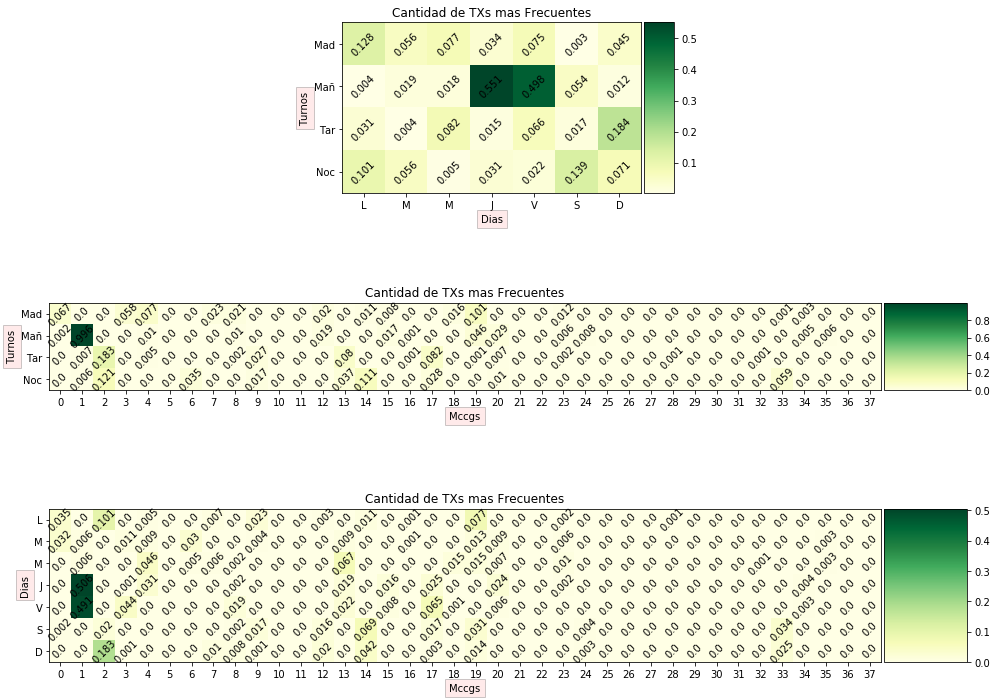

In [45]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
box = dict(facecolor='#ff9999', pad=4, alpha=0.2)

fig, axes = plt.subplots(3, 1, figsize=(15,30))
#fig, axes = plt.subplots(3, 1)
ax1, ax2 , ax3= axes.flatten()
plt.subplots_adjust(top=0.8, bottom=0.5, left=0.10, right=0.95, hspace=0.4, wspace=0.3)



im1 = ax1.imshow(td, cmap="YlGn")
ax1.set_xticks(np.arange(len(dias)))
ax1.set_yticks(np.arange(len(turnos)))
ax1.set_xticklabels(dias)
ax1.set_yticklabels(turnos)
for i in range(len(turnos)):
    for j in range(len(dias)):
        text = ax1.text(j, i, round(td[i, j],3), ha="center", va="center", color="Black", rotation=45)
ax1.set_title('Cantidad de TXs mas Frecuentes')
ax1.set_xlabel('Dias', bbox=box)
ax1.set_ylabel('Turnos', bbox=box)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="10%", pad=0.05)
cbar1 = plt.colorbar(im1, cax=cax1)
ax1.xaxis.set_visible(True)

im2 = ax2.imshow(tm, cmap="YlGn")
ax2.set_xticks(np.arange(38))
ax2.set_yticks(np.arange(len(turnos)))
ax2.set_xticklabels(range(38))
ax2.set_yticklabels(turnos)
for i in range(len(turnos)):
    for j in range(38):
        text = ax2.text(j, i, round(tm[i, j],3), ha="center", va="center", color="Black", rotation=45)
ax2.set_title('Cantidad de TXs mas Frecuentes')
ax2.set_xlabel('Mccgs', bbox=box)
ax2.set_ylabel('Turnos', bbox=box)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="10%", pad=0.05)
cbar2 = plt.colorbar(im2, cax=cax2)
ax2.xaxis.set_visible(True)

im3 = ax3.imshow(dm, cmap="YlGn")
ax3.set_xticks(np.arange(38))
ax3.set_yticks(np.arange(len(dias)))
ax3.set_xticklabels(range(38))
ax3.set_yticklabels(dias)
for i in range(len(dias)):
    for j in range(38):
        text = ax3.text(j, i, round(dm[i, j],3), ha="center", va="center", color="Black", rotation=45)
ax3.set_title('Cantidad de TXs mas Frecuentes')
ax3.set_xlabel('Mccgs', bbox=box)
ax3.set_ylabel('Dias', bbox=box)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="10%", pad=0.05)
cbar3 = plt.colorbar(im3, cax=cax3)
ax3.xaxis.set_visible(True)


# Análisis de Resultados (Acotado por Fechas)

### Acotamos por Fechas que estudiaremos

In [19]:
temporada_inicial = '2016-50'
temporada_final= '2017-07'   # Fecha de la anomalia

result_muestra = result[['customer_tag','year','week','individual_cluster','collective_cluster']]
result_muestra['periodos'] = result_muestra.year.astype(str).str.cat(result_muestra.week.astype(str), sep='-')

result_muestra = result_muestra[(result_muestra.periodos >= temporada_inicial) & (result_muestra.periodos <= temporada_final)]

/home/jkn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [20]:
result_muestra.head()

,customer_tag,year,week,individual_cluster,collective_cluster,periodos
11,++70ByX0a3Q=,2016,50,0,34,2016-50
13,++7i5fi6kBU=,2017,01,0,34,2017-01
16,++8H96p+hLk=,2016,50,0,24,2016-50
21,++93ZWJ5ONQ=,2017,03,1,34,2017-03
22,++93ZWJ5ONQ=,2017,04,3,1,2017-04


## Estadisticas de victimas

## Distribucion de Clientes con "n" Semanas de actividad

## Para Cada Semana

In [21]:
"""#temp = result_muestra.groupby(['profile_id'], as_index=False, sort=True)['customer_tag'].count()

temp= result_muestra.groupby(['periodos'], as_index=False, sort=True).count()


print("=>  ",str(len(temp))," clusters")

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111, frameon=True)
ax.bar(temp.index, temp['customer_tag'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Numero de Semanas que tiene Actividad')
ax.set_xticks(temp.index)


ax.set_ylabel('Num. Clientes')
tag =[]
for j in range(len(temp)):
    nn = ''+ str(j)+''
    tag.append(nn)
    del(nn)

#ax.set_xticklabels(tag, rotation=80)
ax.set_xticklabels(temp['periodos'], rotation=80)
    
title = "Histograma "
ax.set_title(title)
plt.show()
# del(temp)
print('Done')
"""

'#temp = result_muestra.groupby([\'profile_id\'], as_index=False, sort=True)[\'customer_tag\'].count()\n\ntemp= result_muestra.groupby([\'periodos\'], as_index=False, sort=True).count()\n\n\nprint("=>  ",str(len(temp))," clusters")\n\nfig = plt.figure(figsize=(15,4))\nax = fig.add_subplot(111, frameon=True)\nax.bar(temp.index, temp[\'customer_tag\'], align=\'center\')\nax.grid(color=\'gray\', linestyle=\'--\', linewidth=1)\n\nax.set_xlabel(\'Numero de Semanas que tiene Actividad\')\nax.set_xticks(temp.index)\n\n\nax.set_ylabel(\'Num. Clientes\')\ntag =[]\nfor j in range(len(temp)):\n    nn = \'\'+ str(j)+\'\'\n    tag.append(nn)\n    del(nn)\n\n#ax.set_xticklabels(tag, rotation=80)\nax.set_xticklabels(temp[\'periodos\'], rotation=80)\n    \ntitle = "Histograma "\nax.set_title(title)\nplt.show()\n# del(temp)\nprint(\'Done\')\n'

=>   10  clusters


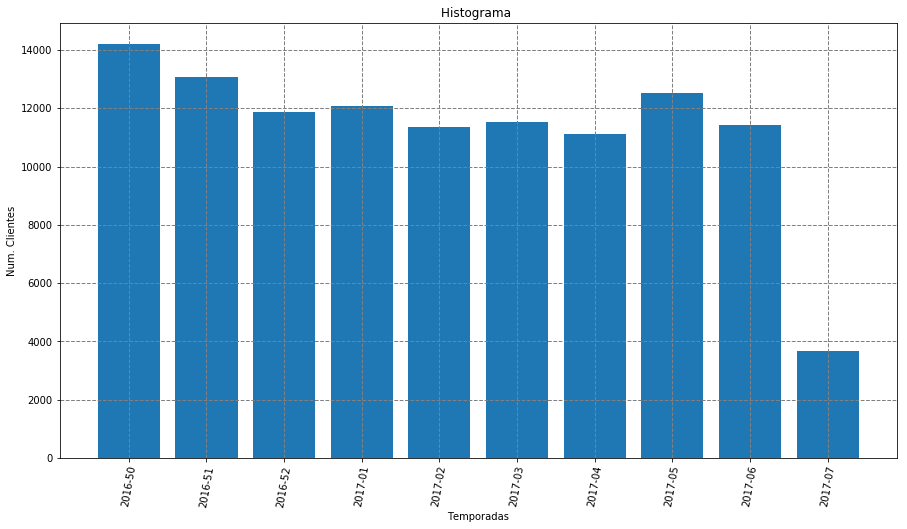

Done


In [22]:
temp= result_muestra.groupby(['periodos'], as_index=False, sort=True)['customer_tag'].count()

print("=>  ",str(len(temp))," clusters")

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, frameon=True)
ax.bar(temp.index, temp['customer_tag'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Temporadas')
ax.set_xticks(temp.index)
ax.set_xticks(list(temp.index))

ax.set_ylabel('Num. Clientes')

ax.set_xticklabels(temp.periodos, rotation=80)
    
title = "Histograma "
ax.set_title(title)
plt.show()
#del(temp)
print('Done')


Sea:

    t0   t1   t2   t3   t0   t4   t5   t6 ... tn
    |interceccion_de_ti(de 1 a n) - t0| = # de Victimas
    

In [23]:
clientes = result_muestra.customer_tag.unique()      # Lista de Clientes
temporadas = result_muestra['periodos'].unique()        # Lista de Temporadas
temporadas

array(['2016-50', '2017-01', '2017-03', '2017-04', '2017-02', '2016-52',
       '2017-06', '2017-05', '2017-07', '2016-51'], dtype=object)

**Considerando**: temporada de una semana tenemos **52 temporadas** en un año, donde un cliente puede tener a **los mas 52 prefiles por año**.

Entonces, consideramos victimas a todos los clientes que **no tuvieron actividad en la temporada t0** y que siempre tuvieron actividades en las pemporadas anteriores.
<div>Recuerde: Cada temporada es de una semana y acotaremos datos entre semana 45 del 2016 y la semana 7 del 2017 (t0)</div>

    Descripción: 
\begin{equation*}
    |\bigcap_{i=0}^{n} t_i - t_0| = 
    \text{# Victimas}
\end{equation*}
           
    Donde: 
\begin{equation*}
    t : \text{una semana} \\
    t_n : \text{2016-45}  \\
    t_0 : \text{2017-07}  \\
    \text{Consideramos que el cliente tiene actividad continua en  las temporadas } t_n \text{ y } t_1
\end{equation*}

In [24]:
# funcion para crear lista de temporadas por cada año por defecto 52, ya que hay 52 semanas en un año
def lista_temporadas(fo,fn,num_temporadas = 52):
    data = []
    years =[]
    
    year_fo = int(fo[:4])
    month_fo = int(fo[5:])
    year_fn = int(fn[:4])
    month_fn = int(fn[5:])
    
    for i in range(0,year_fn-year_fo+1):
        years.append(year_fo+i)
    
    if len(years) == 1:
        if month_fn - month_fo >= 1:
            month = ''
            for i in range(0,month_fn-month_fo+1):
                if month_fo < 10:
                    month = '0'+str(month_fo+i)
                else:
                    month = str(month_fo+i)
                data.append(str(years[0])+'-'+str(month))
        else:
            data.append('Error')
        
    else:
        for j in range(0,len(years)):
            if j == 0:
                month = ''
                for i in range(month_fo,num_temporadas+1):
                    if month_fo < 10:
                        month = '0'+str(month_fo)
                    else:
                        month = str(month_fo)
                    data.append(str(years[j])+'-'+str(month))
                    month_fo += 1

            if j == len(years)-1:
                month = ''
                for i in range(1,month_fn+1):
                    if i < 10:
                        month = '0'+str(i)
                    else:
                        month = str(i)
                    data.append(str(years[j])+'-'+str(month))

            if j != 0 and j != len(years)-1:
                month = ''
                for i in range(1,num_temporadas+1):
                    if i < 10:
                        month = '0'+str(i)
                    else:
                        month = str(i)
                    data.append(str(years[j])+'-'+str(month))
                
    return data

**Aplicando la Formula:**

In [25]:
#victimas= []
victimas= {}
# seleccionamos temporada a estudiar
temporadas= lista_temporadas(temporada_inicial,temporada_final)
clientes = result_muestra.customer_tag.unique()      # Lista de Clientes
    


for i in range(len(clientes)):
    cliente_i= result_muestra[result_muestra['customer_tag'] == clientes[i]]
    
    # Para los clientes que no tuvieron actividad en t0 = "2017-07" , temprada afectada
    # si la temporada  intersectan
    # comparamos longitudes (cliente debe ser 1 menos ya que no debe tener actividad en T0)
    if len(cliente_i) == len(temporadas)-1:
        actividades = sorted(list(cliente_i.periodos) )  # Cargamos temporadas de actividades del cliente
        actividad_to = 1                         # Para los clientes con actividad, incluido t0 
        if temporada_final in actividades:       # Si el cliente tuvo actividad en T0="2017-07" , temprada afectada
            actividad_to = 0
        
        if actividad_to == 1: 
            # cargamos a las victimas
            #victimas.append(cliente_i.customer_tag.iloc[0] )
            victimas[cliente_i.customer_tag.iloc[0]]=actividades 
    if i % 10000 == 1:
        print(i)
            
print(temporadas)


1
10001
20001
30001
40001
50001
60001
70001
['2016-50', '2016-51', '2016-52', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07']


In [26]:
   
for uid in victimas:   
    print(uid,victimas[uid])

+izsnaCw33Y= ['2016-50', '2016-51', '2016-52', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06']
1U1j9dn4ZH4= ['2016-50', '2016-51', '2016-52', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06']
1dFumiXByzM= ['2016-50', '2016-51', '2016-52', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06']
3M38lX/9pa8= ['2016-50', '2016-51', '2016-52', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06']
6FS6GZMD+3I= ['2016-50', '2016-51', '2016-52', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06']
8TjT2dJpsFc= ['2016-50', '2016-51', '2016-52', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06']
BnqH1X7LA2U= ['2016-50', '2016-51', '2016-52', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06']
DhEfNZDnCTo= ['2016-50', '2016-51', '2016-52', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06']
FMOpadbabic= ['2016-50', '2016-51', '2016-52', '2017-01', '2017-02', '2017-03', '2017-04', '2017

## Para K periodos de N semanas

In [27]:
# Establecemos N como el numeor de semana que agruparemos
N = 2

# Lista de Semnas

minimo  = min(result_muestra['periodos']) 
maximo =  max(result_muestra['periodos'])

In [28]:
# numero de semanas entre minimo y maximo 
num_periodos = 0
if int(maximo[:4]) - int(minimo[:4]) == 0:
    num_periodos = int(maximo[5:]) - int(minimo[5:])+1
elif int(maximo[:4]) - int(minimo[:4]) == 1:
    num_periodos = (52 - int(minimo[5:])) + int(maximo[5:])+1
else:
    num_periodos = (int(minimo[:4]) - int(maximo[:4]) -1)*52 + (52 - int(minimo[5:])) + int(maximo[5:])+1


In [29]:
dic = {}
# Cargamos indices de Diccionario
suma = 0
año = int(minimo[:4])
sem = int(minimo[5:])
for i in range(int(num_periodos)):
    if sem < 10:
        semana = "0"+str(sem)
    else: 
        semana = str(sem)
    dic[str(año)+"-"+str(semana)]=0
    suma += N
    sem += 1
    if sem == 53:
        sem = 1
        año += 1
        
# Cargamos diccionario para N periodos, tomaremos como referencia el primer valor 
contador = 0
for item in dic:
    contador += 1
    if contador % N == 1:
        dato = item
    dic[item] = dato

In [30]:
def f(x):
    # Return new index
    return dic[x]

In [31]:
result_muestra['nuevo_periodos'] = result_muestra['periodos']
result_muestra['nuevo_periodos'] = result_muestra['periodos'].apply(f)

In [32]:
result_muestra.head(5)

,customer_tag,year,week,individual_cluster,collective_cluster,periodos,nuevo_periodos
11,++70ByX0a3Q=,2016,50,0,34,2016-50,2016-50
13,++7i5fi6kBU=,2017,01,0,34,2017-01,2016-52
16,++8H96p+hLk=,2016,50,0,24,2016-50,2016-50
21,++93ZWJ5ONQ=,2017,03,1,34,2017-03,2017-02
22,++93ZWJ5ONQ=,2017,04,3,1,2017-04,2017-04


=>   5  clusters


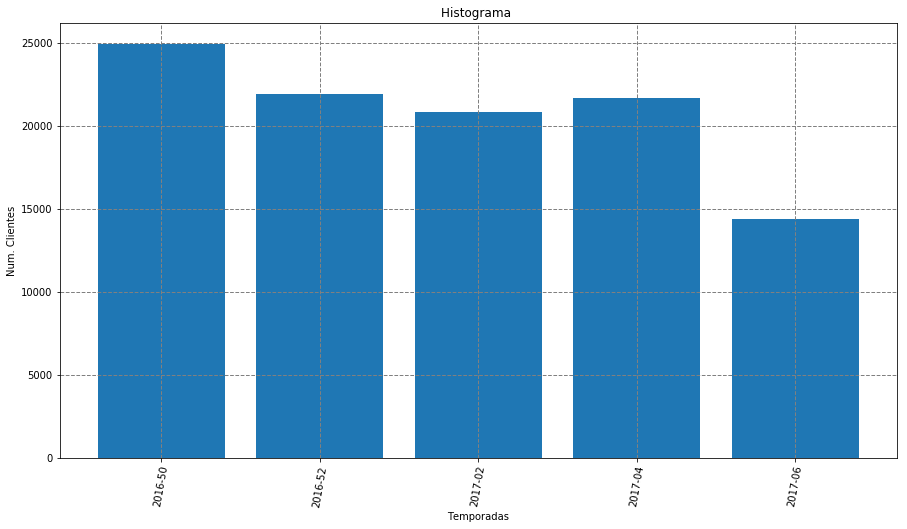

Done


In [33]:
result_muestra2 = result_muestra.groupby(['customer_tag','nuevo_periodos'], as_index=False, sort=True)['periodos'].count()
len(result_muestra2)

temp= result_muestra2.groupby(['nuevo_periodos'], as_index=False, sort=True)['customer_tag'].count()

print("=>  ",str(len(temp))," clusters")

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, frameon=True)
ax.bar(temp.index, temp['customer_tag'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Temporadas')
ax.set_xticks(temp.index)
ax.set_xticks(list(temp.index))

ax.set_ylabel('Num. Clientes')
tag =[]
for j in range(len(temp)):
    nn = temp.nuevo_periodos.loc[j]
    tag.append(nn)
    del(nn)

ax.set_xticklabels(tag, rotation=80)
    
title = "Histograma "
ax.set_title(title)
plt.show()
#del(temp)
print('Done')

In [34]:
result_muestra2

,customer_tag,nuevo_periodos,periodos
0,++70ByX0a3Q=,2016-50,1
1,++7i5fi6kBU=,2016-52,1
2,++8H96p+hLk=,2016-50,1
3,++93ZWJ5ONQ=,2017-02,1
4,++93ZWJ5ONQ=,2017-04,1
5,++L6AKuw+Ro=,2016-50,1
6,++Mr4ALD95c=,2017-02,1
7,++MrcwKVjZ0=,2016-52,1
8,++TRf15NWl4=,2016-50,1
9,++TRf15NWl4=,2017-06,1


In [35]:
clientes = result_muestra2result_muestra2.customer_tag.unique()      # Lista de Clientes
temporadas = result_muestra2['nuevo_periodos'].unique()        # Lista de Temporadas
temporadas

NameError: name 'result_muestra2result_muestra2' is not defined

In [ ]:
# funcion para crear lista de temporadas por cada año por defecto 52, ya que hay 52 semanas en un año
def lista_temporadas(fo,fn,num_temporadas = 52):
    data = []
    years =[]
    
    year_fo = int(fo[:4])
    month_fo = int(fo[5:])
    year_fn = int(fn[:4])
    month_fn = int(fn[5:])
    
    for i in range(0,year_fn-year_fo+1):
        years.append(year_fo+i)
    
    if len(years) == 1:
        if month_fn - month_fo >= 1:
            month = ''
            for i in range(0,month_fn-month_fo+1):
                if month_fo < 10:
                    month = '0'+str(month_fo+i)
                else:
                    month = str(month_fo+i)
                data.append(str(years[0])+'-'+str(month))
        else:
            data.append('Error')
        
    else:
        for j in range(0,len(years)):
            if j == 0:
                month = ''
                for i in range(month_fo,num_temporadas+1):
                    if month_fo < 10:
                        month = '0'+str(month_fo)
                    else:
                        month = str(month_fo)
                    data.append(str(years[j])+'-'+str(month))
                    month_fo += 1

            if j == len(years)-1:
                month = ''
                for i in range(1,month_fn+1):
                    if i < 10:
                        month = '0'+str(i)
                    else:
                        month = str(i)
                    data.append(str(years[j])+'-'+str(month))

            if j != 0 and j != len(years)-1:
                month = ''
                for i in range(1,num_temporadas+1):
                    if i < 10:
                        month = '0'+str(i)
                    else:
                        month = str(i)
                    data.append(str(years[j])+'-'+str(month))
                
    return data

In [ ]:
#victimas= []
victimas= {}
# seleccionamos temporada a estudiar
temporadas= lista_temporadas(temporada_inicial,temporada_final,26)
clientes = result_muestra2.customer_tag.unique()      # Lista de Clientes
    
print(temporadas)

for i in range(len(clientes)):
    cliente_i= result_muestra2[result_muestra2['customer_tag'] == clientes[i]]
    
    # Para los clientes que no tuvieron actividad en t0 = "2017-07" , temprada afectada
    # si la temporada  intersectan
    # comparamos longitudes (cliente debe ser 1 menos ya que no debe tener actividad en T0)
    if len(cliente_i) == len(temporadas)-1:
        actividades = sorted(list(cliente_i['nuevo_periodos']) )  # Cargamos temporadas de actividades del cliente
        actividad_to = 1                         # Para los clientes con actividad, incluido t0 
        if temporada_final in actividades:       # Si el cliente tuvo actividad en T0="2017-07" , temprada afectada
            actividad_to = 0
        
        if actividad_to == 1: 
            # cargamos a las victimas
            #victimas.append(cliente_i.customer_tag.iloc[0] )
            victimas[cliente_i.customer_tag.iloc[0]]=actividades 
    if i % 10000 == 1:
        print(i)
            



In [ ]:
for uid in victimas:   
    print(uid,victimas[uid])